# **Procrastinate Pro+ APP MARKETING INVESTMENT RESEARCH**

*Research purpose:*<br/>
Find reasons for non-recoupment of advertising costs and help the company to become profitable.<br/>
*Research objectives:*<br/>
- Conduct exploratory data analysis.<br/>
- Conduct marketing cost analysis<br/>
- Calculate key business and marketing metrics<br/>
- Give recommendations to the marketing department on the redistribution of the budget

## Step 1. Load the data and prepare it for analysis


*Let's launch the necessary libraries*

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

*Задаем переменные и открываем датасеты*

In [2]:
visits, orders,  costs = (
    pd.read_csv('/content/drive/MyDrive/dataf/visits_info_short.csv'),  
    pd.read_csv('/content/drive/MyDrive/dataf/orders_info_short.csv'),  
    pd.read_csv('/content/drive/MyDrive/dataf/costs_info_short.csv'),  
)

*Let's run dataframes for review*



In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


The visits_log_short table (server log with information about site visits):

    User Id - unique user identifier
     Device — user device category
     Session start - date and time of the session start
     Session End - date and time the session ends
     Channel - identifier of the advertising source from which the user came
     Region - user's country

Table orders_log_short (information about orders):

    User Id - unique id of the user who made the order
     Event Dt - date and time of purchase
     Revenue - revenue from this user





Table costs_short (information about marketing costs):

    Channel - advertising source identifier
     Dt - date
     Costs - the cost of this advertising source on this day

*Let's start data preprocessing: check for data gaps, duplicates, and data types:*

In [7]:
print(visits.info()),
print (orders.info()),
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

*There are no gaps in the data, the dates have the "object" type unsuitable for further work, in the future, we will convert these columns to the appropriate type - daytime, also note that the columns are not converted to lowercase, so we bring the names of the columns in line:*

In [8]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end']

In [9]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [10]:
costs.columns = ['dt', 'channel', 'costs']

*Next we check the rename*

In [11]:
print(visits.head(1)),
print (orders.head(1)),
print(costs.head(1))

        user_id         region  device  channel        session_start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session_end  
0  2019-05-01 02:45:01  
        user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
           dt   channel  costs
0  2019-05-01  FaceBoom  113.3


*The renaming is done successfully, then we look for and count duplicates:*

In [12]:
print('Number of duplicates in visits {}'.format(visits.duplicated().mean())),
print ('Number of duplicates in orders {}'.format(orders.duplicated().mean())),
print('Number of duplicates in costs {}'.format(costs.duplicated().mean()))

Number of duplicates in visits 0.0
Number of duplicates in orders 0.0
Number of duplicates in costs 0.0


*Duplicates  not found, replace data types:*

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [14]:
print(visits.info()),
print (orders.info()),
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage:

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
We renamed the columns, checked the data for gaps and duplicates, and changed the data type of the columns we need. The data is preprocessed and ready for analysis.<br/>
We will write the functions that will be needed to analyze the main indicators of metrics and visualization.

## Step 2. Let's create functions for calculating and analyzing LTV, ROI, retention, and conversion



*Let's create a function to get user profiles:*

In [15]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visitation occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # add flags for all events from event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # combine advertising spending and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of organic user acquisition is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

*Function for calculating user retention*

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the payer column to the passed dimensions list
    dimensions = ['payer'] + dimensions

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get a retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # we get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

*Function for calculating conversion*

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the size of the cohort
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

*Function for calculating LTV and ROI*

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        # we build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each “cell” in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        #restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect dataframe with user data and CAC values, 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # we calculate the average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the sizes of cohorts, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  # LTV
        result_in_time,  # LTV dynamics
        roi_grouped,  # ROI
        roi_in_time,  # ROIdynamics
    ) 

*Now let's write functions to visualize these metrics — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi()*

*Function for frame smoothing*

In [19]:
def filter_data(df, window):
    # for each column apply a moving average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

*Function to visualize retention*

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the table of dynamics we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the indexes of the hold table,
    # add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the table of graphs - two columns and two rows, four cells
    # in the first we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell we build non-paying retention curves
    # vertical axis - from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell - the dynamics of retention of paying
    ax3 = plt.subplot(2, 2, 3)
    # get column names for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering data and plotting
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Аcquisition date')
    plt.title(
        'Dynamics of retention of paying users on {} day'.format(
            horizon
        )
    )

    # in the fourth cell - the dynamics of retention of non-paying
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filtering data and plotting
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Аcquisition date')
    plt.title(
        'Dynamics of retention of non-paying users on {} day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

*Функция для визуализации конверсии*

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes and first day retention
    conversion = conversion.drop(columns=['cohort_size'])
    # in the table of dynamics we leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first graph - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Conversion of users')

    # the second graph is the dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date will become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Аcquisition date')
    plt.title('Dynamics of conversion of users on {} day'.format(horizon))

    plt.tight_layout()
    plt.show() 

*Функция для визуализации LTV и ROI*

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(20, 10))

    # we exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # write the cost of acquisition in a separate frame
    cac_history = roi_history[['cac']]

    # from the table roi we exclude the sizes of cohorts and cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph - LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # the second graph is the dynamics of ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Аcquisition date')
    plt.title('Dynamics of LTV users on {} day'.format(horizon))

    # the third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Аcquisition date')
    plt.title('User Acquisition Cost Dynamics')

    # fourth graph - roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # the fifth graph is the dynamics of roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all index columns except date will become pivot table columns
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Аcquisition date')
    plt.title('Dynamics of ROI of users on {} day'.format(horizon))

    plt.tight_layout()
    plt.show() 

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
Functions for researching the necessary metrics are ready. Let's start the exploratory analysis.

## Step 3. Let's conduct an exploratory data analysis



*Let's compose portraits (profiles) of application users, and apply the written get_profiles function*

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


*Let's calculate the minimum and maximum date of user acquisition:*

In [24]:
min_analysis_date = profiles['dt'].min()
mах_analysis_date = profiles['dt'].max()

In [25]:
print('Minimum user acquisition date {}'.format(
    min_analysis_date))
print ('Maximum user acquisition date {}'.format(
   mах_analysis_date))

Minimum user acquisition date 2019-05-01
Maximum user acquisition date 2019-10-27


*Let's consider the geography of the app's users: What countries do the visitors come from? Which countries have the most paying users?*

In [26]:
users_by_country = profiles.groupby('region').agg({'user_id': 'nunique','payer':'mean'}).rename(columns={'user_id': 'users_by_country','payer':'payers,%'}).sort_values(by='users_by_country', ascending=False)
users_by_country['payers,%']=users_by_country['payers,%']*100
users_by_country 

,users_by_country,"payers,%"
region,,
United States,100002,6.901862
UK,17575,3.982930
France,17450,3.799427
Germany,14981,4.111875


In [27]:
payers_by_country = profiles[profiles['payer']==True].groupby('region').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'payers_by_country'}).sort_values(by='payers_by_country', ascending=False)
payers_by_country

,payers_by_country
region,
United States,6902
UK,700
France,663
Germany,616


*Let's build user distribution graphs depending on location*

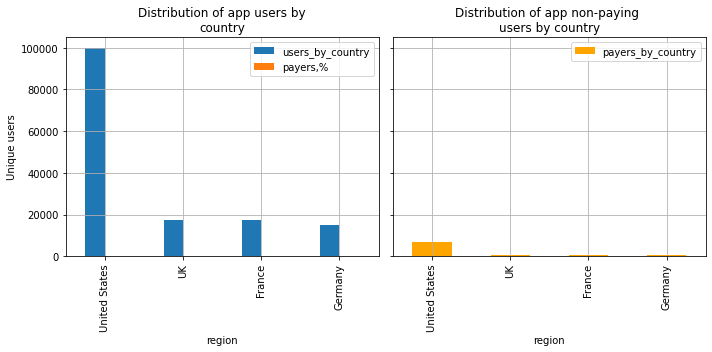

In [28]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 2, 1)
users_by_country.plot(kind='bar',
        grid=True, ax=ax1
    )
plt.legend()
plt.title('Distribution of app users by' '\n''country')
plt.ylabel ('Unique users')

ax2 = plt.subplot(1, 2, 2, sharey = ax1)
payers_by_country.plot(kind='bar', grid=True, ax=ax2, color = 'orange')
plt.legend()
plt.title('Distribution of app non-paying ' '\n''users by country')

plt.tight_layout() 
plt.show()

*The graph shows that most of the users of the application are situated in the United States. The US also has the highest percentage of paying users (almost 7% versus 4% on average for other countries). In numerical terms, Germany is in 2nd place in terms of paying users, and in percentage terms, the United Kingdom. It should be noted that, in general, the rest of the countries are approximately at the same level.*

*Let’s take a look at Which devices the app’s visitors use and which devices paying users to use most often:*

In [29]:
users_by_device =profiles.groupby('device').agg({'user_id': 'nunique', 'payer':'mean'}).rename(columns={'user_id': 'users_by_device','payer':'payers,%'}).sort_values(by='users_by_device', ascending=False)
users_by_device['payers,%']=users_by_device['payers,%']*100
users_by_device

,users_by_device,"payers,%"
device,,
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790
Mac,30042,6.364423


In [30]:
payers_by_device = profiles[profiles['payer']==True].groupby('device').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'payers_by_device'}).sort_values(by='payers_by_device', ascending=False)
payers_by_device

,payers_by_device
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


*Let's visualize device usage data with distribution graphs:*

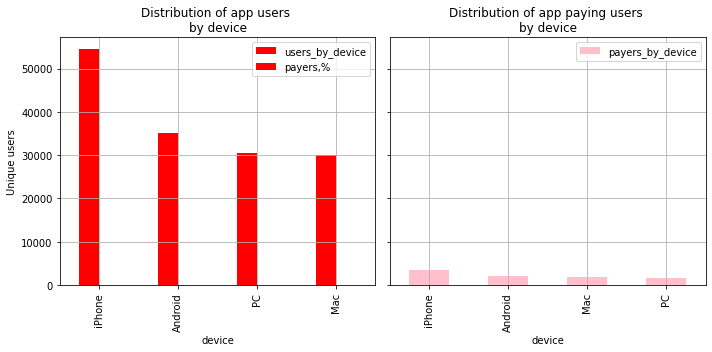

In [31]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 2, 1)
users_by_device.plot(kind='bar',
        grid=True, ax=ax1, color = 'red'
    )
plt.legend()
plt.title('Distribution of app users ''\n''by device')
plt.ylabel ('Unique users')
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
payers_by_device.plot(kind='bar', grid=True, ax=ax2, color = 'pink')
plt.legend()
plt.title('Distribution of app paying users ''\n''by device')

plt.tight_layout() 
plt.show()

*Most of the users come from the iPhone (54000), from other devices it is about the same 30-35000. The percentage of paying users of the total number of device users is approximately the same (5-6%)*

*Next, consider the acquisition channels: What advertising channels did you use to attract users? Which channels bring in the most paying users?*

In [32]:
users_by_channel =profiles.groupby('channel').agg({'user_id': 'nunique', 'payer':'mean'}).rename(columns={'user_id': 'users_by_channel','payer':'payers,%'}).sort_values(by='users_by_channel', ascending=False)
users_by_channel['payers,%']=users_by_channel['payers,%']*100
users_by_channel

,users_by_channel,"payers,%"
channel,,
organic,56439,2.055316
FaceBoom,29144,12.204914
TipTop,19561,9.600736
OppleCreativeMedia,8605,2.707728
LeapBob,8553,3.063253
WahooNetBanner,8553,5.296387
RocketSuperAds,4448,7.913669
MediaTornado,4364,3.574702
YRabbit,4312,3.826531


In [33]:
payers_by_channel = profiles[profiles['payer']==True].groupby('channel').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'payers_by_channel'}).sort_values(by='payers_by_channel', ascending=False)
payers_by_channel['payers,%'] = users_by_channel['payers,%']
payers_by_channel=payers_by_channel.sort_values(by='payers,%', ascending=False)
payers_by_channel

,payers_by_channel,"payers,%"
channel,,
FaceBoom,3557,12.204914
AdNonSense,440,11.340206
lambdaMediaAds,225,10.469986
TipTop,1878,9.600736
RocketSuperAds,352,7.913669
WahooNetBanner,453,5.296387
YRabbit,165,3.826531
MediaTornado,156,3.574702
LeapBob,262,3.063253


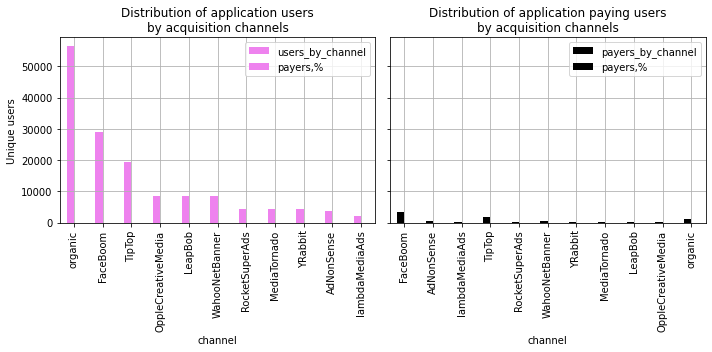

In [34]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 2, 1)
users_by_channel.plot(kind='bar',
        grid=True, ax=ax1, color = 'violet'
    )
plt.legend()
plt.title('Distribution of application users''\n''by acquisition channels')
plt.ylabel ('Unique users')
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
payers_by_channel.plot(kind='bar', grid=True, ax=ax2, color = 'black')
plt.legend()
plt.title('Distribution of application paying users''\n''by acquisition channels')

plt.tight_layout() 
plt.show()

*Leading in the number of organic users. Followed by FaceBoom and TipTop. Almost on par with him. In the middle OppleCreativeMedia, Leapbob, and WahooNetBanner.
By paying users In quantitative terms, FaceBoom, TipTop, and organic.
The leaders in terms of conversion are FaceBoom (12%), AdNonSense (11%) and lambdaMediaAds (10.5%)*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**<br/>
1. The largest audience of the application is in the USA, the rest of the countries are distributed approximately evenly. Conversion across countries is also distributed but remains at a low level.
2. The main device from which both paying and non-paying users exit is the iPhone. The share of other devices is distributed approximately equally.
3. The largest share of organic users may indirectly indicate the incorrect spending of the advertising budget. The main acquisition channels are FaceBoom and TipTop. However, the TipTop channel's low conversion rate compared to other acquisition sources stands out a lot.
    In the next section, we will try to explore in depth the distribution of advertising budgets.


## Step 4.Let's  analyze marketing costs



*Let's calculate the total advertising costs for the observation period*

In [70]:
print('The total advertising costs for the observation period were {} dollars'.format(round( 
    profiles['acquisition_cost'].sum()
)))

The total advertising costs for the observation period were 105497 dollars


*We will remove organic users to have up-to-date data for marketing evaluation*

In [36]:
profiles = profiles.query('channel != "organic"').copy()

*Of these, we will consider how the budget was distributed between the sources:*

In [37]:
promotional_cost_by_channel = (
    profiles.groupby('channel').agg({'acquisition_cost': 'sum'})
    .rename(columns={'acquisition_cost': 'promotional_cost'})
    .sort_values(by='promotional_cost', ascending=False)
    .reset_index()
)    
promotional_cost_by_channel['part_of_total_cost'] = promotional_cost_by_channel['promotional_cost']/105497
promotional_cost_by_channel

,channel,promotional_cost,part_of_total_cost
0,TipTop,54751.30,0.518984
1,FaceBoom,32445.60,0.307550
2,WahooNetBanner,5151.00,0.048826
3,AdNonSense,3911.25,0.037075
4,OppleCreativeMedia,2151.25,0.020392
5,RocketSuperAds,1833.00,0.017375
6,LeapBob,1797.60,0.017039
7,lambdaMediaAds,1557.60,0.014764
8,MediaTornado,954.48,0.009047
9,YRabbit,944.22,0.008950


*Two channels take 80% of the advertising budget.*

*We will build a plot for the distribution of advertising budgets between channels and the distribution of paying users.*

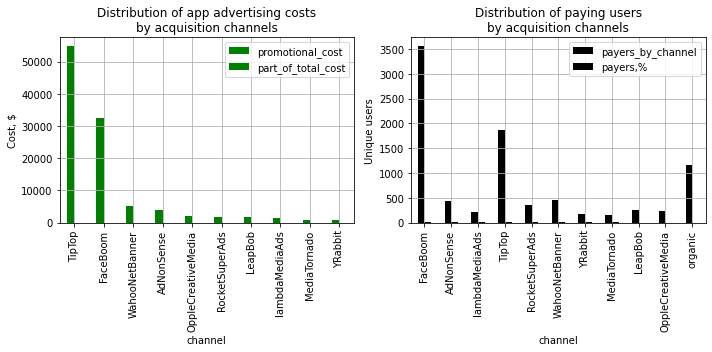

In [71]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 2, 1)
promotional_cost_by_channel.plot(kind='bar',
        grid=True, ax=ax1, color = 'green', x='channel' 
    )
plt.legend()
plt.title('Distribution of app advertising costs''\n''by acquisition channels')
plt.ylabel ('Cost, $')
ax2 = plt.subplot(1, 2, 2)
payers_by_channel.plot(kind='bar', grid=True, ax=ax2, color = 'black')
plt.legend()
plt.title('Distribution of paying users''\n''by acquisition channels')
plt.ylabel ('Unique users')
plt.tight_layout() 
plt.show()

*TipTop(54750) accounts for the largest advertising spend, accounting for 51% of the advertising budget. On the second place is FaceBoom(32445) which is 30% of the advertising budget. Next comes a sharp reduction in budgets and a smoother distribution. Compared with the distribution schedule of paying users, we see that TipTop is noticeably inferior to FaceBoom, despite the larger advertising budget.*

*Next, we calculate the cost of acquisition of each client depending on the channel.*

In [39]:
cac_by_channel = (
    profiles.groupby('channel').agg({'acquisition_cost': 'sum', 'user_id': 'nunique'})
    .rename(columns={'acquisition_cost': 'promotional_cost', 'user_id':'users' })
    .sort_values(by='promotional_cost', ascending=False)
    .reset_index()
)    
cac_by_channel['cac'] = cac_by_channel['promotional_cost']/cac_by_channel['users']
cac_by_channel.sort_values(by='cac', ascending=False)

,channel,promotional_cost,users,cac
0,TipTop,54751.30,19561,2.799003
1,FaceBoom,32445.60,29144,1.113286
3,AdNonSense,3911.25,3880,1.008054
7,lambdaMediaAds,1557.60,2149,0.724802
2,WahooNetBanner,5151.00,8553,0.602245
5,RocketSuperAds,1833.00,4448,0.412095
4,OppleCreativeMedia,2151.25,8605,0.250000
9,YRabbit,944.22,4312,0.218975
8,MediaTornado,954.48,4364,0.218717
6,LeapBob,1797.60,8553,0.210172


*The cost of customer acquisition TipTop is many times higher than other acquisition channels*

In [72]:
print('The total Customer Acquisition Cost amounted to {} dollars'.format(
    profiles['acquisition_cost'].sum()/profiles['user_id'].count()
))

The total Customer Acquisition Cost amounted to 1.1274813239427588 dollars


*Let's see the changes in metrics over time*

In [41]:
promotional_cost_by_time = (
    profiles.groupby('dt').agg({'acquisition_cost': 'sum'})
    .rename(columns={'acquisition_cost': 'promotional_cost'})
    .sort_values(by='promotional_cost', ascending=False)
)    
promotional_cost_by_time

,promotional_cost
dt,
2019-09-28,1075.485
2019-09-29,1064.970
2019-09-22,1041.455
2019-09-27,1034.140
2019-10-03,984.255
...,...
2019-05-14,259.885
2019-05-08,259.595
2019-05-09,243.670


'   '

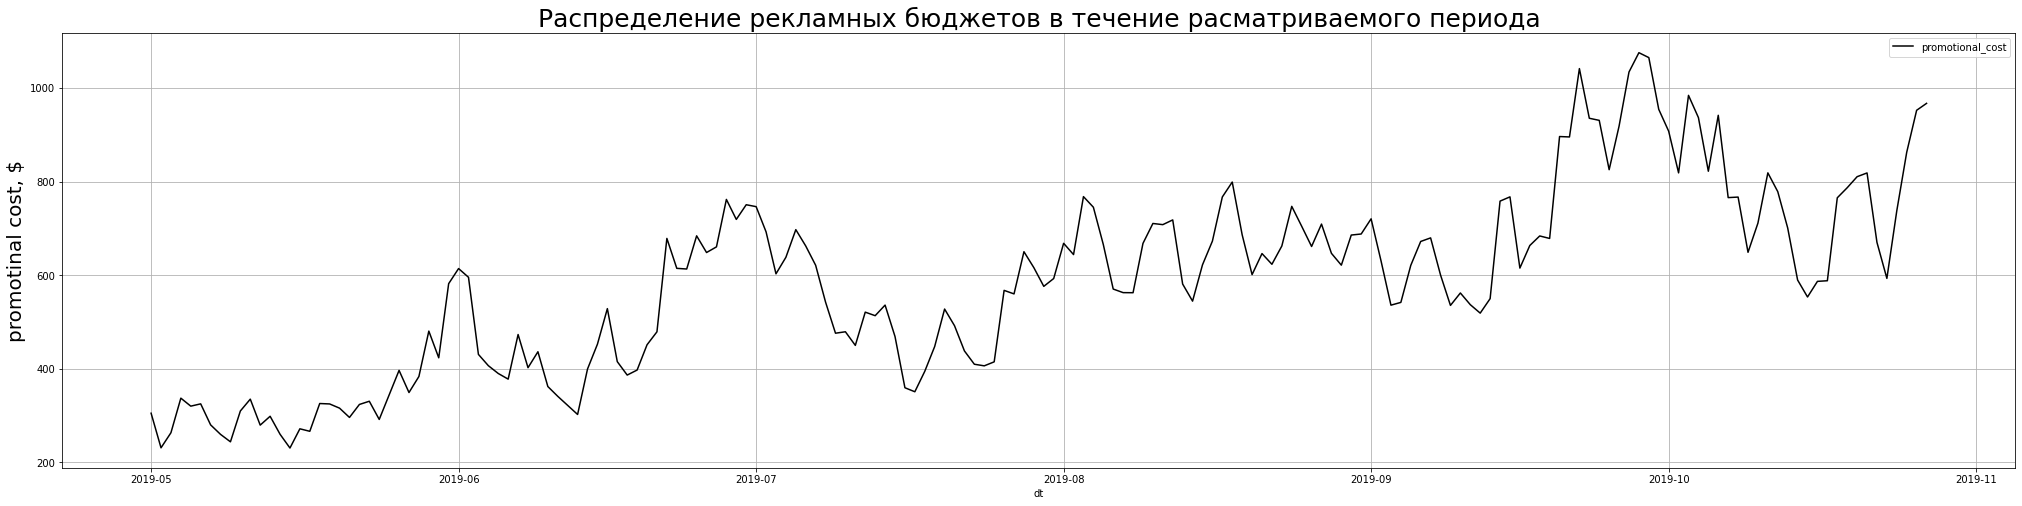

In [42]:
profiles.groupby('dt').agg({'acquisition_cost': 'sum'}).rename(columns={'acquisition_cost': 'promotional_cost'}).plot (grid=True, color = 'black', figsize=(35,8))
    
plt.title('Распределение рекламных бюджетов в течение расматриваемого периода', size=25)
plt.ylabel('promotinal cost, $', size = 20)
;    

'   '

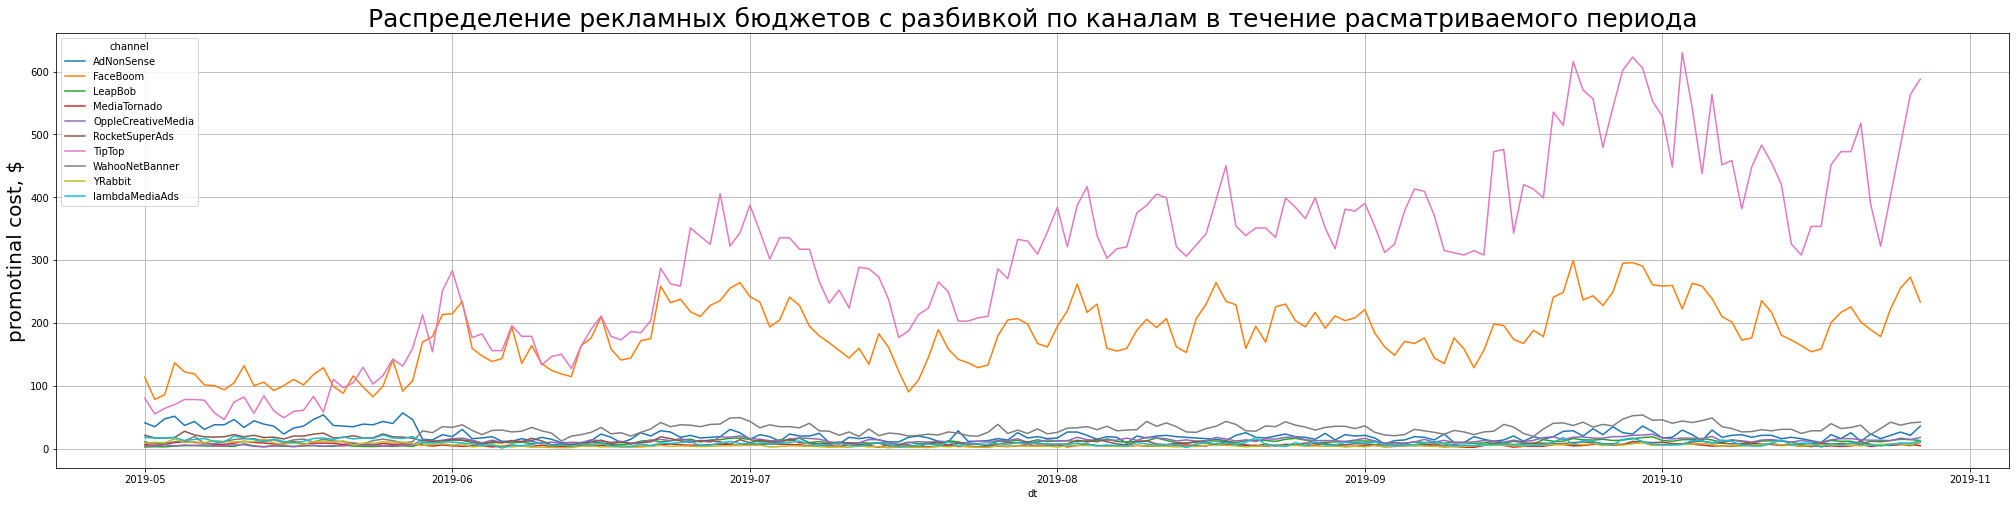

In [43]:
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').rename(columns={'acquisition_cost': 'promotional_cost'}).plot (grid=True,  figsize=(35,8))
    
plt.title('Распределение рекламных бюджетов с разбивкой по каналам в течение расматриваемого периода', size=25)
plt.ylabel('promotinal cost, $', size = 20)
;    

*Recently, there has been a sharp increase in the advertising budget. Especially for expensive platforms Faceboom and TipTop*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**<br/>
  As is shown in the research analysis, it turns out that the largest advertising budget is spent on acquistition customers with TipTop and FaceBoom. At the same time, the cost of attracting customers with TipTop is 2 times higher. Given the low conversion rate of this acquisition channel, we can already talk about the need to reduce these costs and redistribute the advertising budget. To do this, we will further calculate the main metrics of advertising payback.

##Step 5. Let's estimate the payback of advertising to attract users


### Let's analyze the overall payback of an advertising

In [76]:
# calculate LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date = datetime(2019, 11, 1).date(), horizon_days=14
)

In [74]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


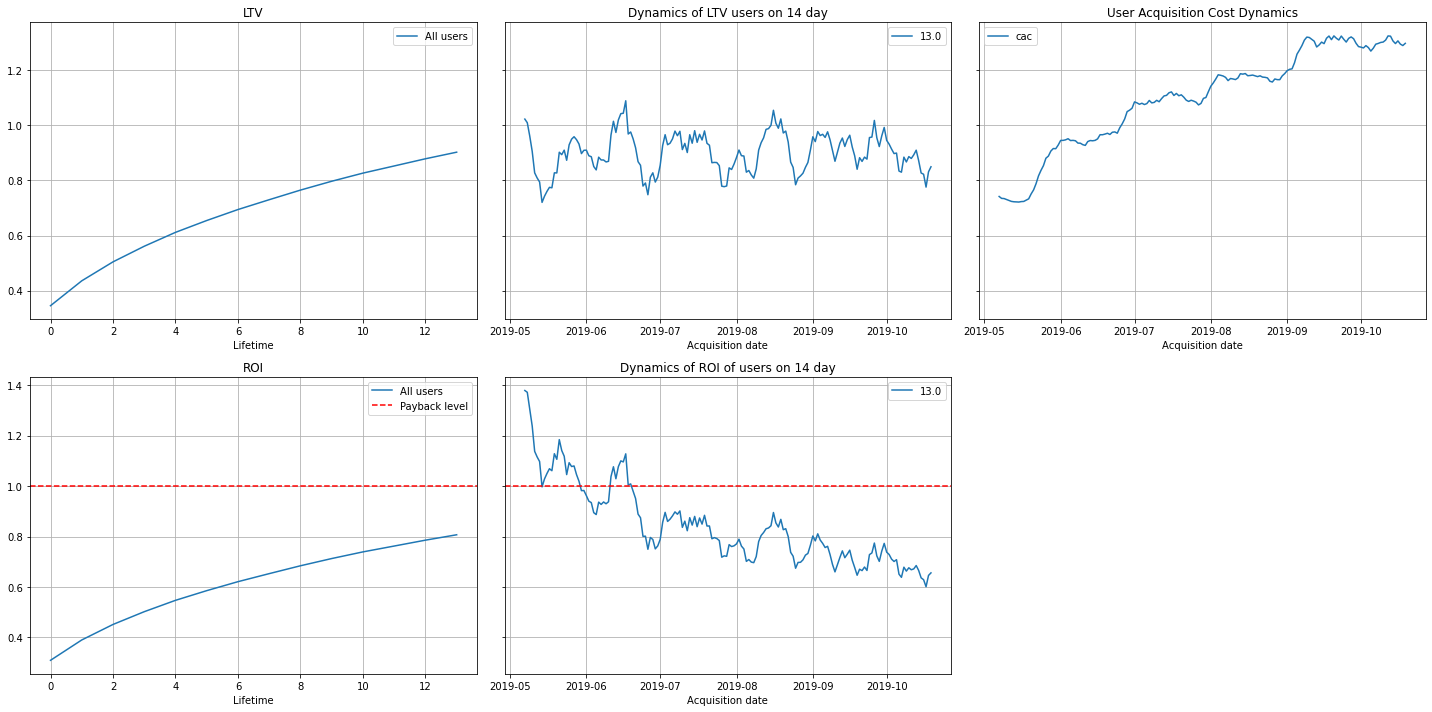

In [77]:

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14) 

*The overall marketing investment return chart shows that even on the 14th day, the costs do not pay off. ROI 14 days is 0.8.
The LTV graph, the “lifetime value” of the client, has a normal appearance, that is, it grows evenly, but the CAC graph has an abnormal appearance with a sharp increase, which indicates an increase in advertising budgets.*

### Let's analyze the payback of advertising by devices

In [78]:
# see payback by device

dimensions = ['device']
observation_date = datetime(2019, 11, 1).date() 
horizon_days=14
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)



In [79]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20683,1.019759,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,17747,1.276219,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,18128,0.792724,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,32086,1.277021,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


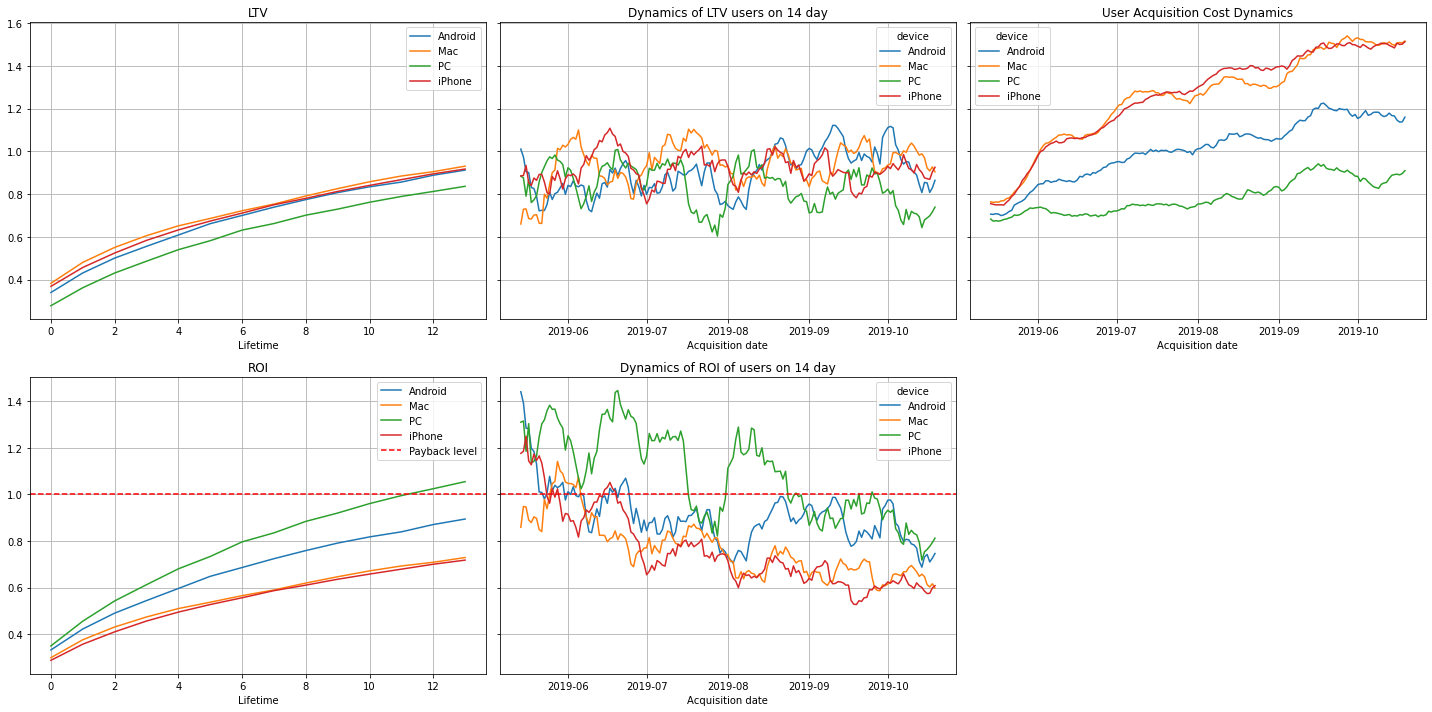

In [80]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

*Despite the lower LTV among PC users, the payback level was passed on the 12th day. The rest of the platforms do not pay off, close to the payback of Android. At the same time, advertising for iPhone and MAC users did not pay off even on the 14th day, which is contrary to the business plan. It should also be noted the relatively high cost of acquistition for users of these platforms. Also is shown in the dynamics graph that payback on PC is finished in September.*

###Let's analyze the payback of advertising by country

In [50]:
dimensions = ['region']
bservation_date = datetime(2019, 11, 1).date() 
horizon_days=14
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [51]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,,
France,10516,0.459836,0.420645,0.564947,0.677842,0.783319,0.884863,0.978985,1.046066,1.103029,1.177559,1.241542,1.304903,1.352373,1.413265,1.457644
Germany,9030,0.464898,0.400840,0.556806,0.705411,0.807645,0.909395,0.991414,1.068917,1.148797,1.228449,1.302148,1.379887,1.432426,1.487111,1.533709
UK,10536,0.454922,0.480704,0.652335,0.808109,0.915777,1.023264,1.107802,1.222385,1.287350,1.371094,1.418984,1.470208,1.521847,1.582249,1.634306
United States,58562,1.455876,0.288682,0.356923,0.405928,0.447689,0.483222,0.513729,0.541018,0.567254,0.590622,0.613990,0.634347,0.653111,0.670649,0.687776


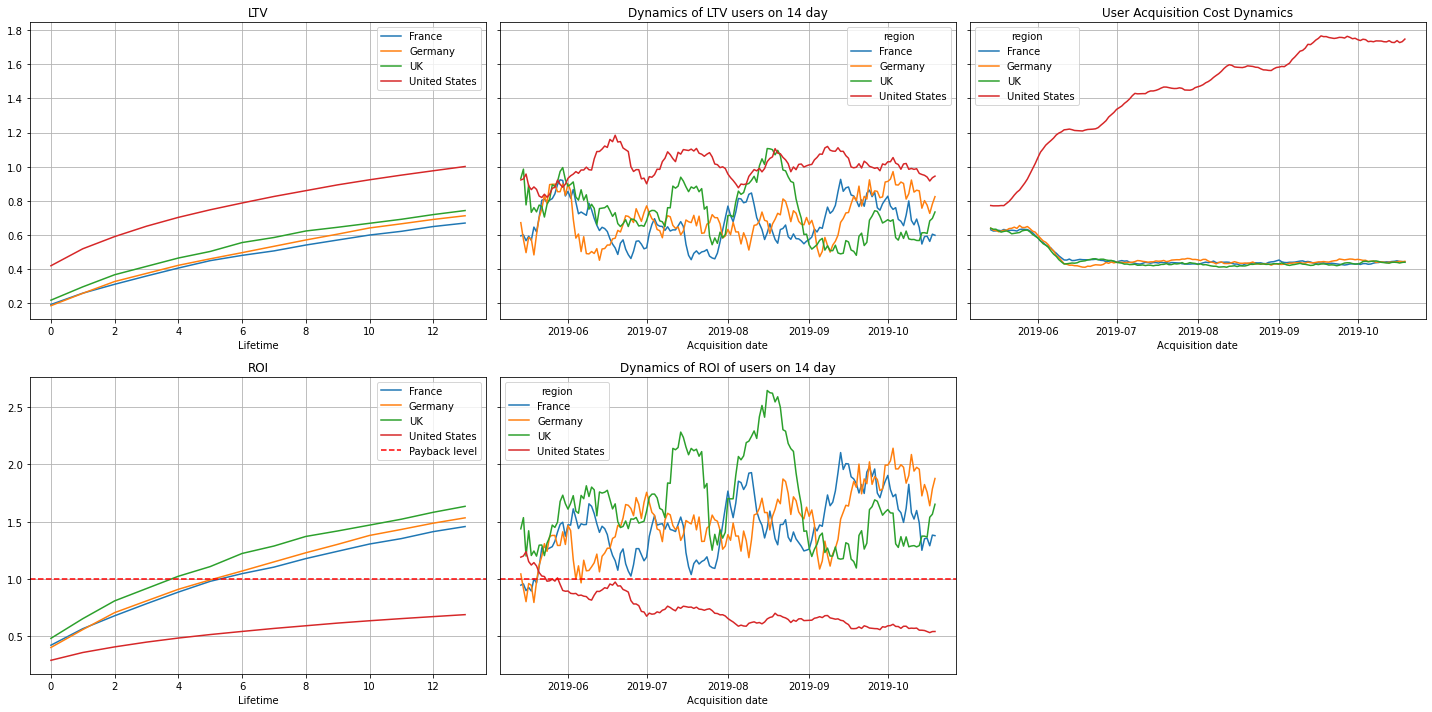

In [52]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

*The United Kingdom paid off first (day 5), followed by Germany and France (day 7). At the same time, the USA did not pay off for 14 days, while the UK, Germany, and France paid off 1.5 times. The giant size of the US cohort, compared to others, should also be noted. Also notable is the increase in U.S. user acquisition spending in June, which did not affect ad ROI.*

### Let's analyze the payback of advertising by advertising channels

In [86]:
# look at the payback broken down by sources of acquisition

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [ ]:
roi_grouped

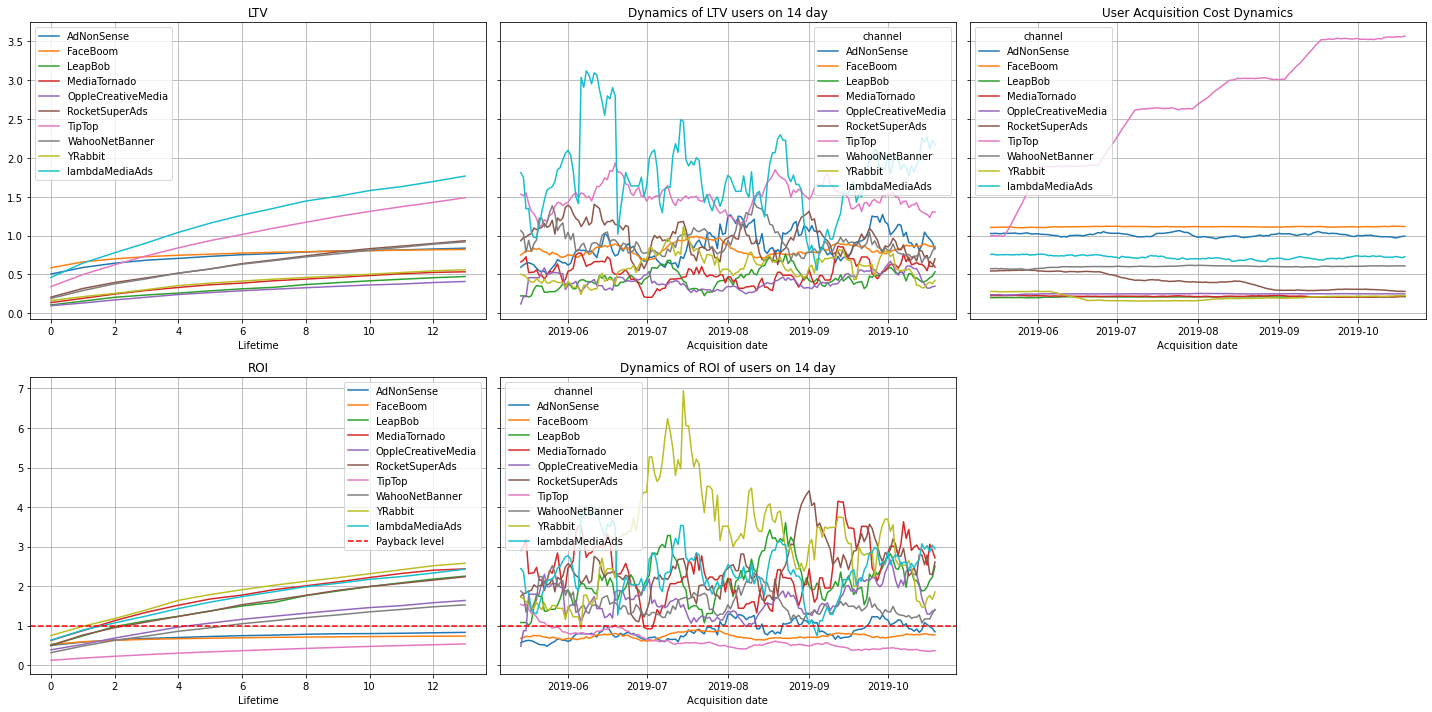

In [88]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

*The graphs show that only three acquisition channels, TipTop, FaceBoom, and AdNonSense, did not pay off. YRabbit, lambdaMediaAds, and MediaTornado demonstrated the highest payback (on day 3). They are followed by RocketSuperAds and LeapBob (on day 4). The payback of expensive platforms TipTop, FaceBoom is very low, 0.5 and 0.7 respectively, while the cost of advertising on TipTop is growing very strongly, and it is the most problematic*


  
*Separately, we will build charts for TipTop users from the USA*


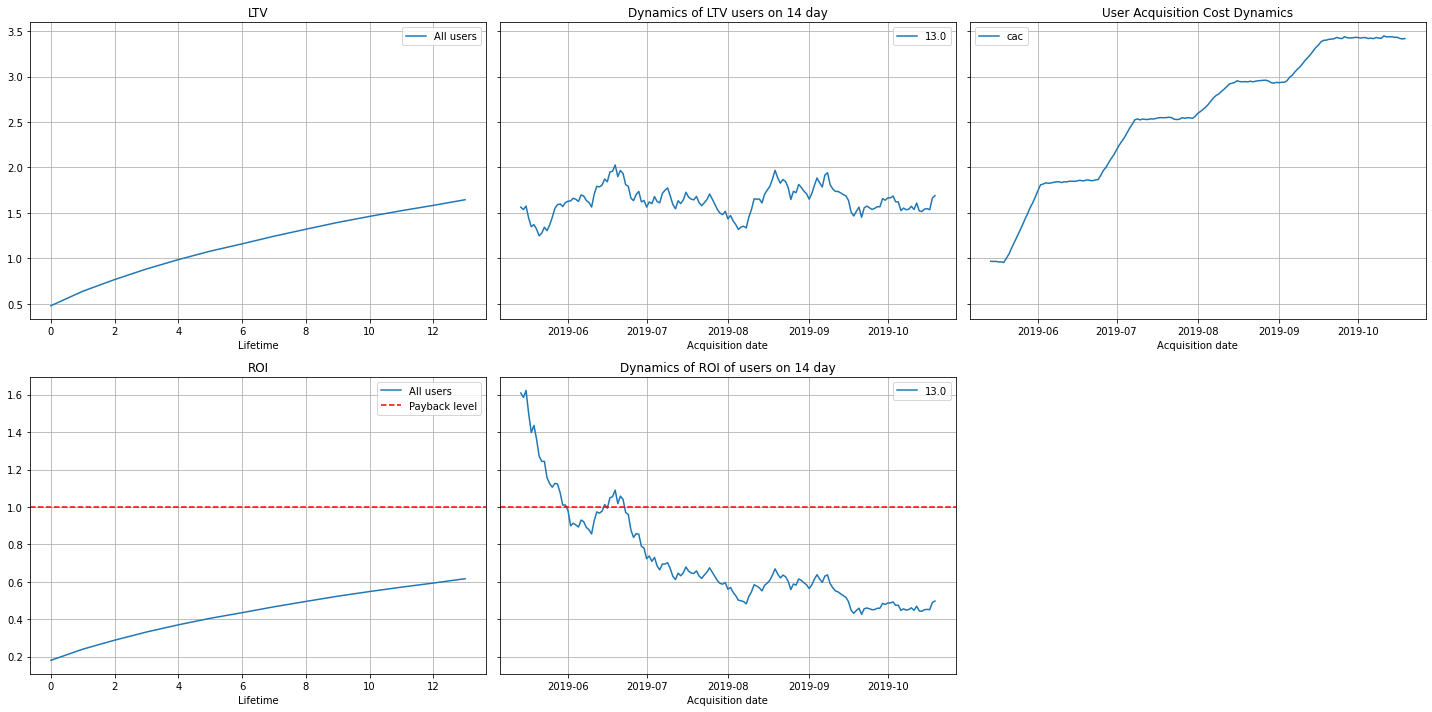

In [89]:
v=visits[(visits['region']=='United States') & (visits['channel']=='TipTop')]
p = get_profiles(v, orders, costs)
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    p, orders, observation_date = datetime(2019, 11, 1).date(), horizon_days=14
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [90]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,19101,2.670714,0.179904,0.239426,0.287541,0.331156,0.369604,0.404529,0.434465,0.465947,0.494592,0.52263,0.547516,0.570973,0.592809,0.61615


*As we can see from the graph, the main focus of the advertising budget on these users did not give any result at all, and the payback on day 14 was only 0.62*

### Next, let's look at user conversions based on certain parameters.

*Total User Conversion*

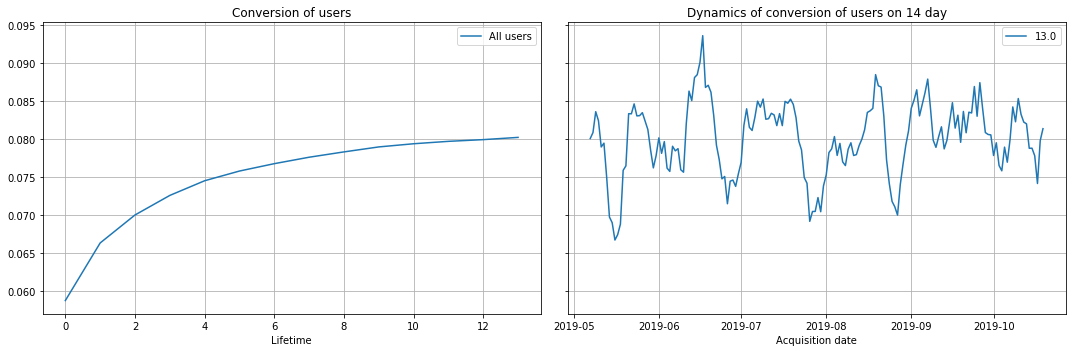

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*The conversion is quite low and is at the level of 8%. In June 2019, the advertising budget was increased, which led to a slight increase in the overall conversion of users*

*Consider conversion based on different channels*

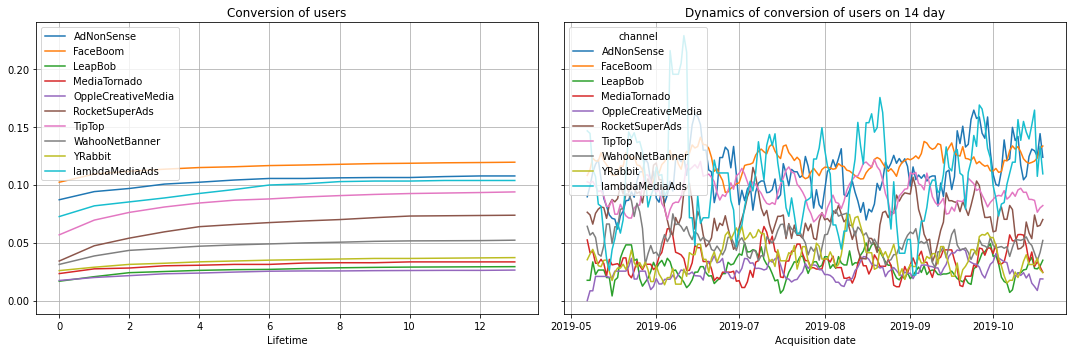

In [59]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

In [60]:
conversion_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.086980,0.094003,0.096704,0.100486,0.102107,0.103998,0.105348,0.105348,0.105889,0.106159,0.106159,0.106969,0.107509,0.107509
FaceBoom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
LeapBob,8103,0.016660,0.020610,0.024065,0.025052,0.026040,0.026657,0.026904,0.027644,0.028261,0.028631,0.028878,0.029002,0.029125,0.029248
MediaTornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
OppleCreativeMedia,8139,0.017324,0.019904,0.021501,0.023099,0.023713,0.024573,0.025310,0.025556,0.025556,0.025802,0.025925,0.026047,0.026047,0.026293
RocketSuperAds,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
TipTop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
WahooNetBanner,8082,0.031180,0.038481,0.043306,0.045038,0.046894,0.048008,0.048874,0.049740,0.050359,0.051101,0.051472,0.051596,0.051720,0.052091
YRabbit,4102,0.025841,0.028766,0.031204,0.032179,0.033398,0.034130,0.034861,0.035349,0.035836,0.036324,0.036324,0.036568,0.036811,0.037055


*FaceBoom (12%) is the leader in conversion among acquisition channels, followed by AdNonSense (11%), lambdaMediaAds (10%). TipTop users, who spent the most advertising budgets, converted only 9.3%.*

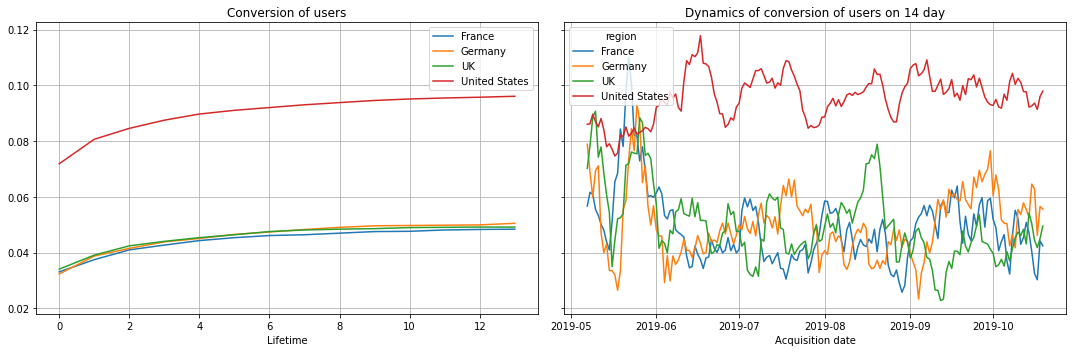

In [61]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*In the USA, conversion is 2 times higher than in Germany, Great Britain and France*

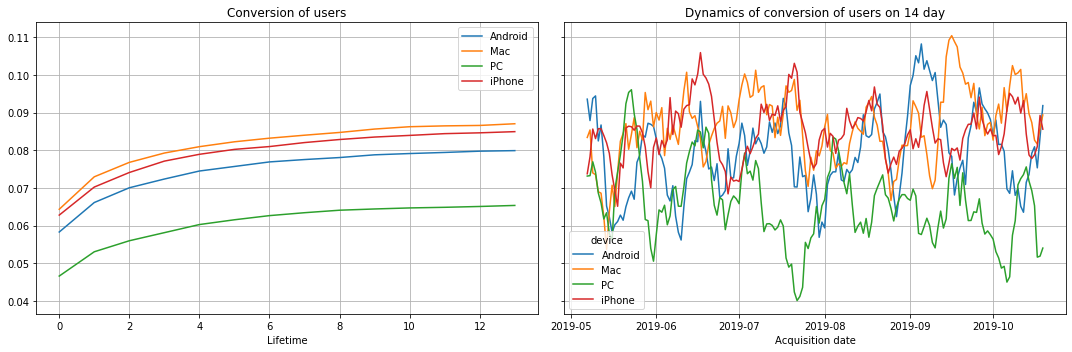

In [62]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Looking at conversion by device, PC users are in last place. Although in general, it is worth noting that it is quite similar (from 6 to 8.5%)*

### Next, consider the overall retention of paying and non-paying users and its dynamics

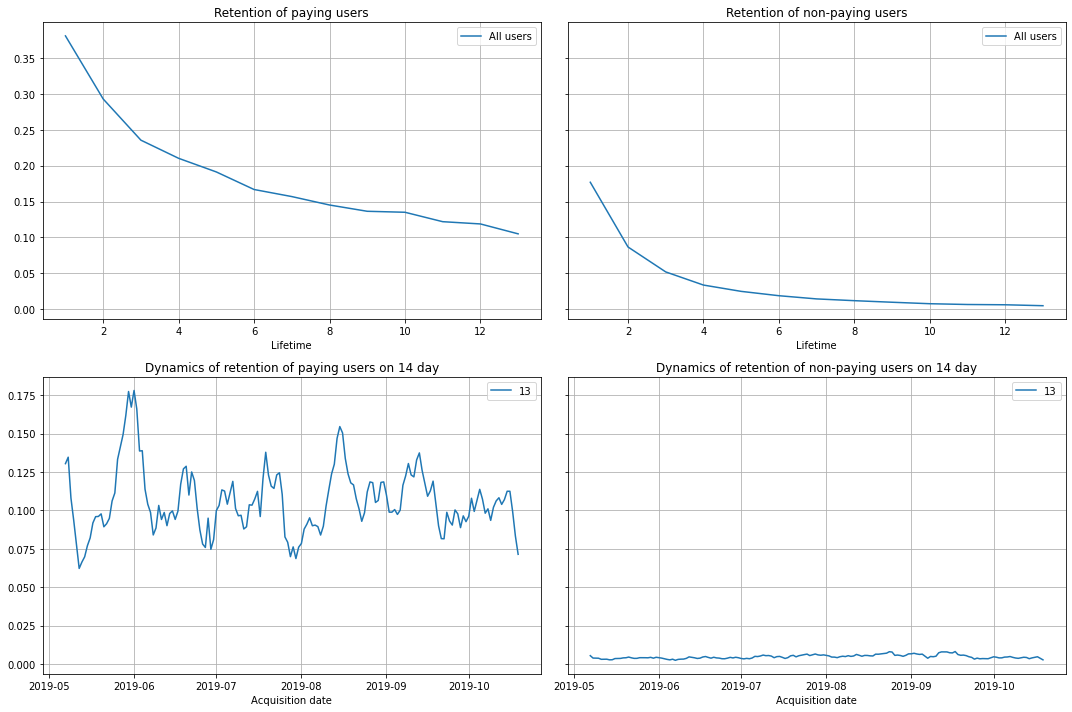

In [63]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [64]:
retention_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


*The retention of paying users is higher than non-paying users, as it should be, while on day 14, user retention remains at 10%, which is quite high, the dynamics show that users who came in June and paid are retained better than others*

*Let's consider user retention depending on the platform from which they log in*

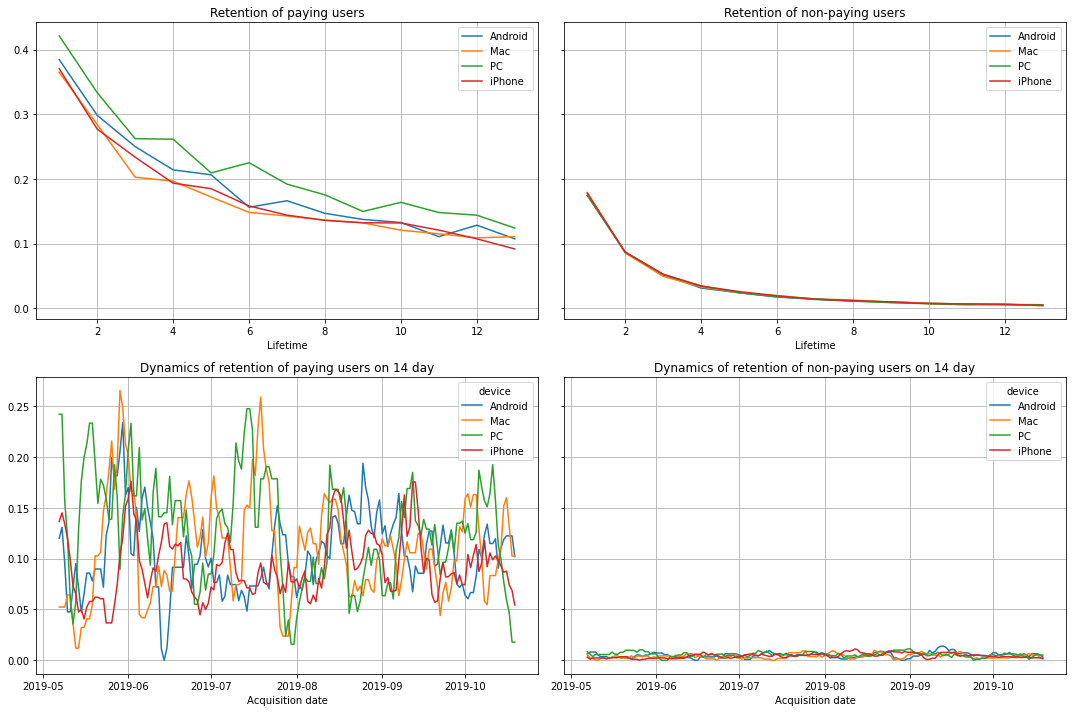

In [65]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [66]:
retention_grouped

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      Mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      PC             16920  1.0  0.174704  0.087234  0.052364  0.034574   
      iPhone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
True  Android         1695  1.0  0.384661  0.298525  0.250147  0.214159   
      Mac             1597  1.0  0.365059  0.284283  0.202880  0.196619   
      PC              1208  1.0  0.421358  0.333609  0.262417  0.261589   
      iPhone          2810  1.0  0.370463  0.277224  0.233808  0.193594   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      Mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      PC       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
      iPhone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
True  Android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   
      Mac      0.172198  0.148403  0.142768  0.136506  0.132123  0.120852   
      PC       0.209437  0.225166  0.192053  0.175497  0.149834  0.163907   
      iPhone   0.185053  0.158363  0.144128  0.135943  0.132384  0.132028   

                     11        12        13  
payer device                                 
False Android  0.006530  0.005477  0.005056  
      Mac      0.006440  0.006254  0.004025  
      PC       0.005437  0.005851  0.005556  
      iPhone   0.006832  0.006319  0.004372  
True  Android  0.110914  0.128614  0.107375  
      Mac      0.115216  0.108954  0.110833  
      PC       0.148179  0.144040  0.124172  
      iPhone   0.120996  0.107473  0.091815

*Retention of non-paying users is platform-independent. But the quality of paying users attracted from personal computers is higher than from other platforms, coupled with the high return on advertising on PC, this is a very high indicator of the quality of incoming users, the same is true for Android users, iPhone users are the worst retained*

*Retention based on user country*

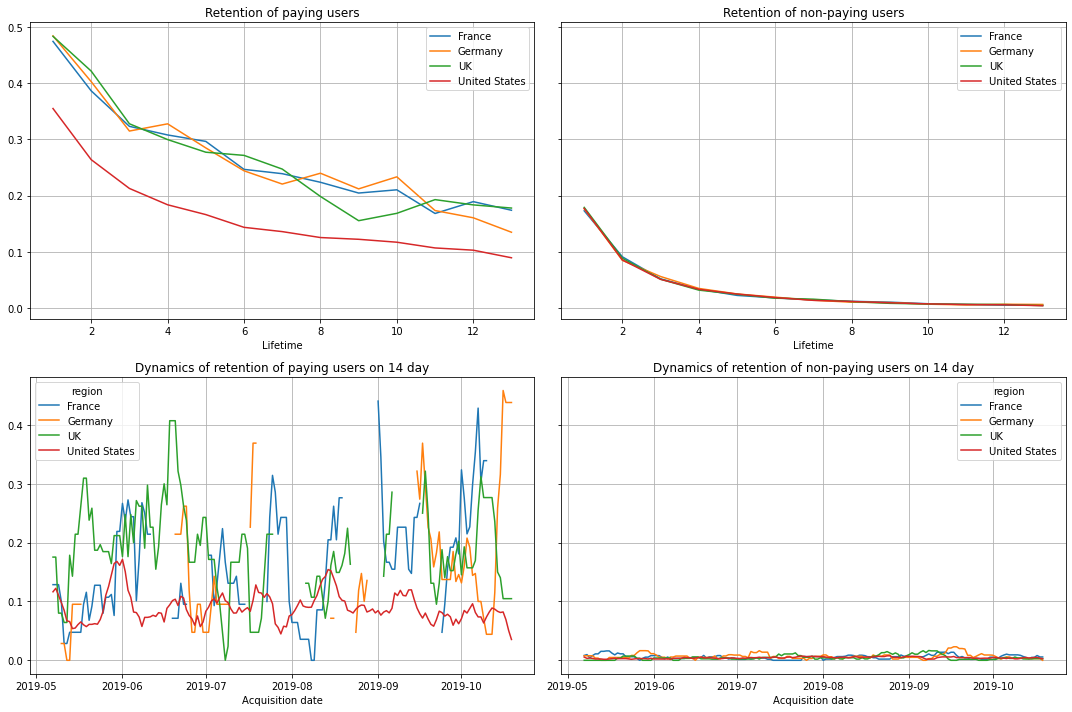

In [67]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

*The lowest payer retention in the USA indicates a low quality of customers. The UK and France are among the leaders, showing stable results, but in general, the rest of the countries are approximately on the same level.*

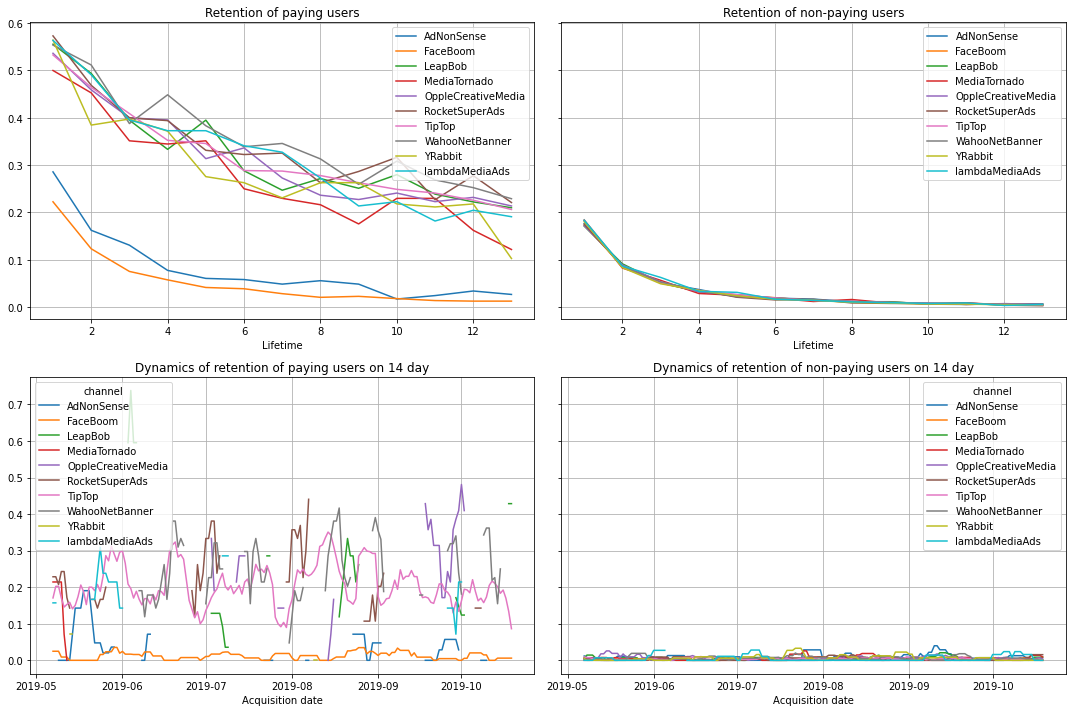

In [68]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [69]:
retention_grouped

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.011250  0.006081  0.005473  0.006993  0.006689  
      FaceBoom            0.010007  0.008064  0.005500  0.006616  0.004342  
      LeapBob             0.010433  0.007252  0.006616  0.005344  0.004835  
      MediaTornado        0.008460  0.007216  0.008957  0.004479  0.004976  
      OppleCreativeMedia  0.008461  0.008334  0.005556  0.007198  0.005683  
      RocketSuperAds      0.007661  0.007150  0.008427  0.003830  0.002809  
      TipTop        

*Retention across platforms is generally the same for paying users, but there are two big underdogs AdNonSense and FaceBoom. Leading WahooNetBanner and RocketSuperAds*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**<br/>
1. According to the results of the research of metrics, it can be seen that in the USA, where the largest advertising budget and advertising does not pay off, the most buyers come, however, the retention of these buyers is quite low.<br/>
2. The same trend is happening in terms of the platforms from which users come. The PC user conversion is lower than other platforms, however, they are retained better than iPhone users by 3%, and the advertising return on this platform (ROI) = 1.5, while advertising on the iPhone does not pay off at all.<br/>
3. From the point of view of user acquisition channels, the TipTop channel converts well and is retained, but at the same time, advertising does not pay off due to the large budget. The quality of users attracted by FaceBoom is poor in all respects: ads do not pay off, retention is lower than on other platforms, and conversion is the highest. The most promising acquisition channels are YRabbit(2.57), lambdaMediaAds(2.43) and MediaTornado(2.43).<br/>


## Step 6. General conclusion





<div style="border:solid pink 2px; padding: 20px">
    
<br/>
1. Procrastinate Pro+ users come from 4 countries. In the US, there are a large number of users and users who make purchases within this application.<br/>
2. Most often, users use iPhones to access the application, then Android. The percentage of paying users is distributed approximately the same.<br/>
3. The distribution of advertising budgets focuses on TipTop and FaceBoom, while the cost of acquiring customers with TipTop is 2 times higher.<br/>
4. From the calculation of the main business metrics, it can be seen that users from the United States, which are the most, are better than users from other countries converting into buyers, with a difference of only 4%, however, the retention of these users is worse than users from other countries where advertising pays off for the first week of attraction, unlike residents of the United States where advertising does not pay off even on the 14th day. The most promising in the region of acquisition is the UK.<br/>
5. iPhone users, who are also the focus of the advertising campaign, and who spend the most on the advertising budget, also convert well into buyers and also with a 2% difference, but also have poor retention, while PC users, who have high retention, are retained the best, and advertising on them pays off already on the 12th day after attraction, it may also be due to the higher quality of the interface of this platform.<br/>
6. Through acquisition channels, TipTop converts and retains well, but at the same time, advertising does not pay off due to the large budget and high cost. The quality of users attracted through FaceBoom is poor in all respects: ads do not pay off, retention is lower than on other platforms, and conversion is the highest. The most promising acquisition channels are YRabbit(2.57), lambdaMediaAds(2.43) and MediaTornado(2.43).<br/>

## Recommendations

  <div style="border:solid pink 2px; padding: 20px">
     The Procrastinate Pro+ marketing department needs to reallocate advertising budgets from TipTop and FaceBoom to YRabbit, and also focus on the UK and German markets, and PC users.<br/>
    In the US, it is necessary to increase the quality of customers who will be retained longer, while in other markets to increase the number of attracted customers, as well as their conversion.